In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 4: Transformations and KDEs

### Objective
In this lab you will get some practice plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the World Bank containing various statistics for countries and territories around the world. 

**This assignment should be completed and submitted by 11:59 PM on Tuesday, October 28th**.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ds100_utils

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")

## Loading Data

Let us load some World Bank data into a pandas.DataFrame object named ```wb```.

In [3]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [4]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will look at the distribution of values for female adult literacy rate as well as the gross national income per capita. The code below creates a copy of the DataFrame that contains only the two Series we want, and then drops all rows that contain null values in either column.

**Note:** For this lab we are dropping null values without investigating them further. However, this is generally not the best practice and can severely affect our analyses.

In [5]:
#creates a DataFrame with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [6]:
df.head(5)

,lit,inc
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. We can use [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) in seaborn to create bar charts from categorical data. 

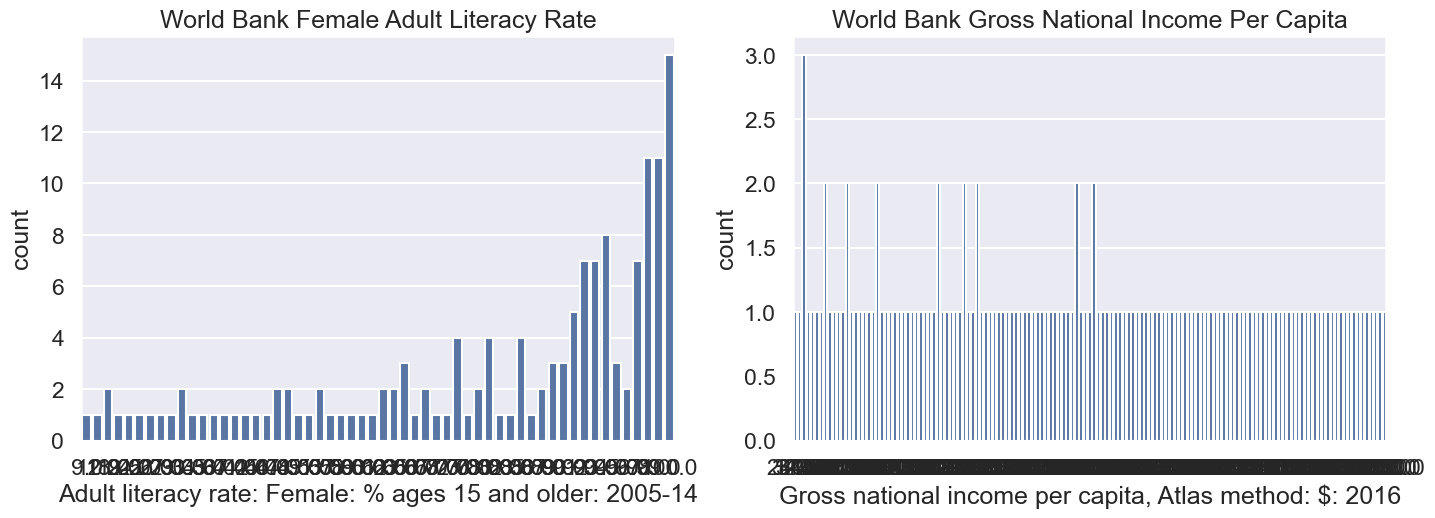

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = df['lit'])
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.countplot(x = df['inc'])
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

In the cell below, explain why `countplot` is NOT the right tool for visualizing the distribution of our data.

<!--
BEGIN QUESTION
name: q1a
-->

**Your response**: Countplot is designed for categories (like colors or types), not numbers. It counts how many times each exact value appears. Since we have numerical data here, countplot isn't the right choice.

## Question 1b

In the cell below, create a plot of literacy rate and income per capita using [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. When you call `histplot`, set the `kde` parameter to False.

Don't forget to title the plot and label axes!

**Hint:** *Copy and paste from above to start.*

<!--
BEGIN QUESTION
name: q1b1
-->

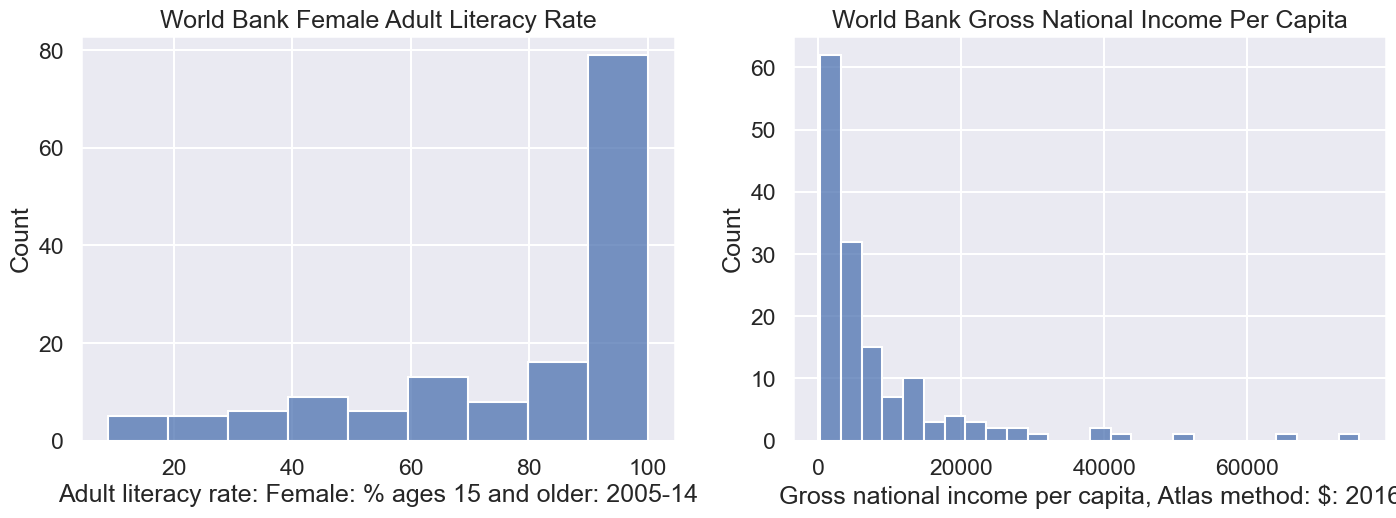

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data = df, x = df['lit'], kde=False)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.histplot(data = df, x = df['inc'], kde = False)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()


You should see histograms that show the counts of how many data points appear in each bin. `histplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).

In the cell below, try creating the exact same plot again, but this time set the `kde` parameter to True.

<!--
BEGIN QUESTION
name: q1b2
-->

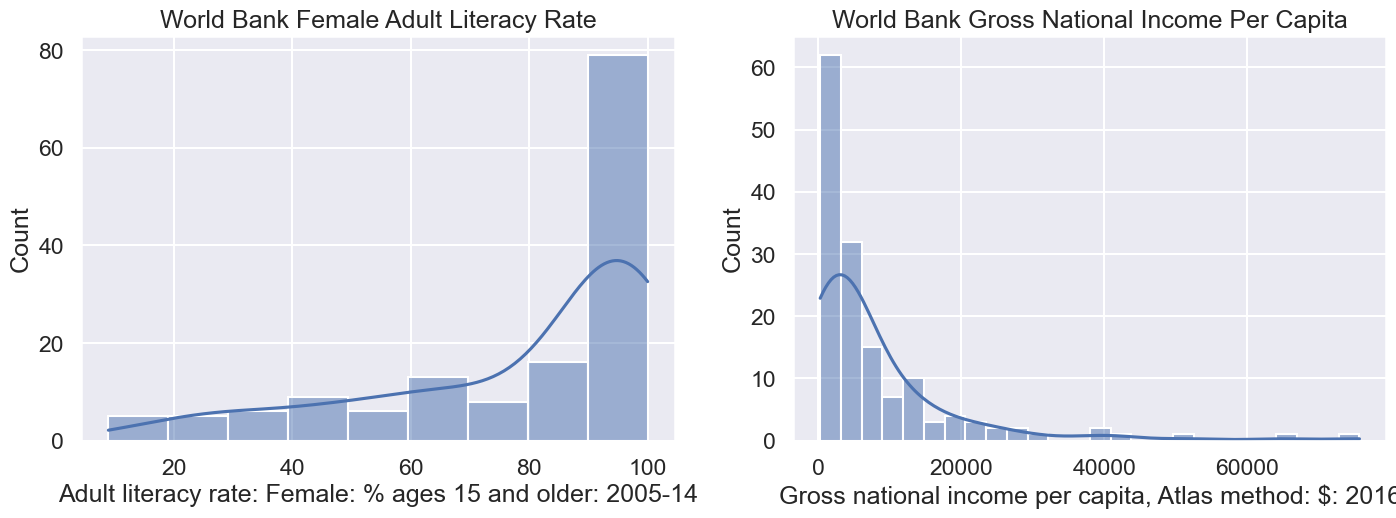

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data = df, x = df['lit'], kde = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.histplot(data = df, x = df['inc'], kde = True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()



You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. Remember that the KDE is just an estimate, as is the histogram.

We'll talk more about KDEs later in this lab.

## Question 1c

Looking at the income data, it is difficult to see the distribution among low income countries because they are all scrunched up at the left side of the plot.

Transforming the `inc` data logarithmically gives us a more symmetric distribution of values. This can make it easier to see patterns.

In addition, summary statistics like the mean and standard deviation (square-root of the variance) are more stable with symmetric distributions.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and `kde=True`. Be sure to correct the axis label using `plt.xlabel`.

<!--
BEGIN QUESTION
name: q1c
-->

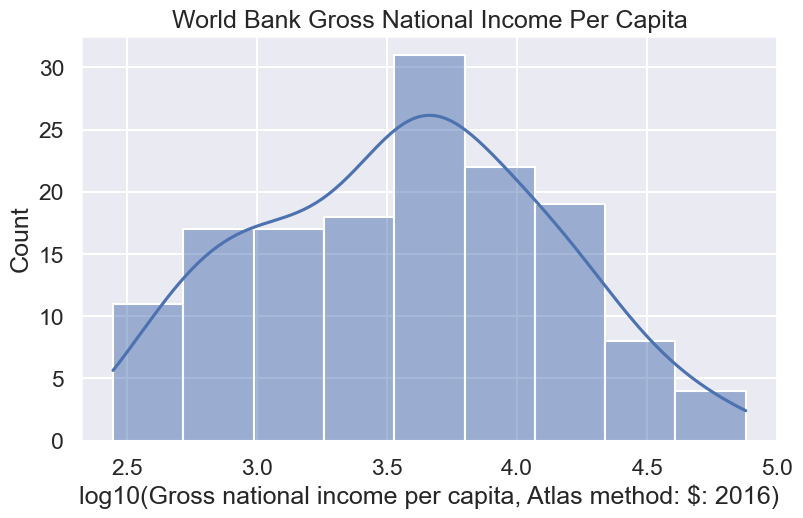

In [22]:
plt.figure(figsize=(8,5))

sns.histplot(x = np.log10(df['inc']), kde=True)
plt.xlabel("log10(Gross national income per capita, Atlas method: $: 2016)")
plt.title('World Bank Gross National Income Per Capita')
plt.show()

When a distribution has a long right tail, a log-transformation often does a good job of symmetrizing the distribution, as it did here.  Long right tails are common with variables that have a lower limit on the values. 

On the other hand, long left tails are common with distributions of variables that have an upper limit, such as percentages (can't be higher than 100%) and GPAs (can't be higher than 4).  That is the case for the literacy rate. Typically taking a power-transformation such 
as squaring or cubing the values can help symmetrize the left skew distribution.

In the cell below, make a distribution plot of `lit` with the data transformed using a power, i.e., raise `lit` to the 2nd, 3rd, and 4th power. Select the transformation that you think is best. Be sure to set `kde=True` and correct the axis label using `plt.xlabel`. 

<!--
BEGIN QUESTION
name: q1c2
-->

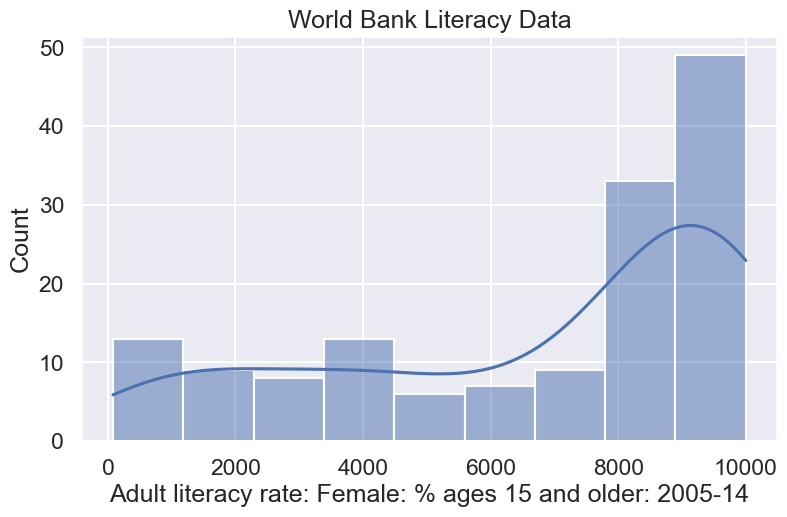

In [31]:
plt.figure(figsize=(8,5))

sns.histplot(x = df['lit']**2, kde = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Literacy Data')
plt.show()


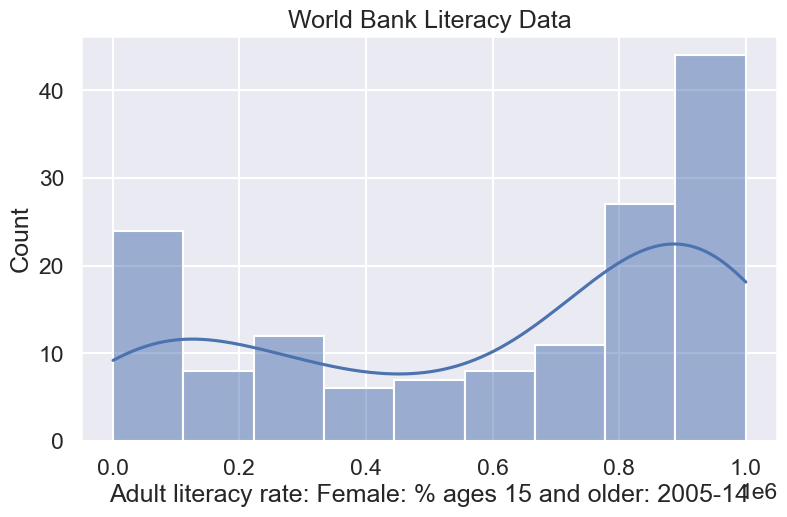

In [32]:
plt.figure(figsize=(8,5))

sns.histplot(x = df['lit']**3, kde = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Literacy Data')
plt.show()

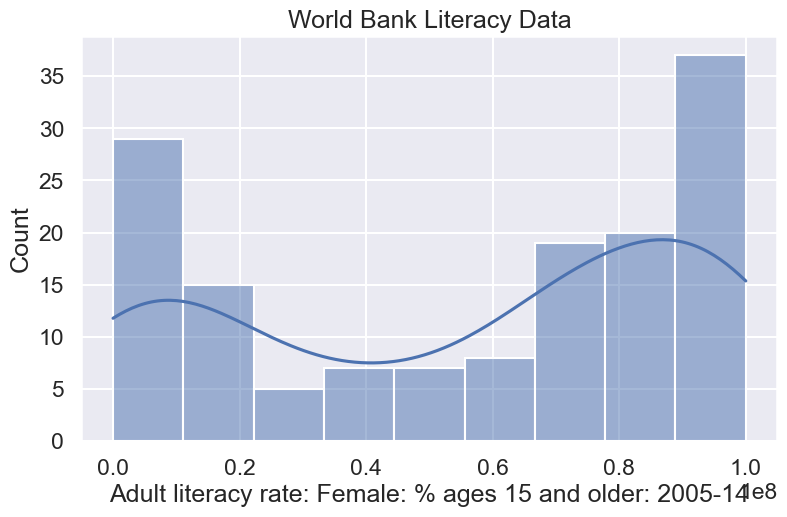

In [33]:
plt.figure(figsize=(8,5))

sns.histplot(x = df['lit']**4, kde = True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Literacy Data')
plt.show()

In [36]:
#**Your response**: Transformation to the 4th is better, is less skewed to either side, as you raise the power it becomes more centered. 

## Question 1d

If we want to examine the relationship between the female adult literacy rate and the gross national income per capita, we need to make a scatter plot. 

In the cell below, create a scatter plot of untransformed income per capita and literacy rate using the `sns.scatterplot` function. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.

<!--
BEGIN QUESTION
name: q1d
-->

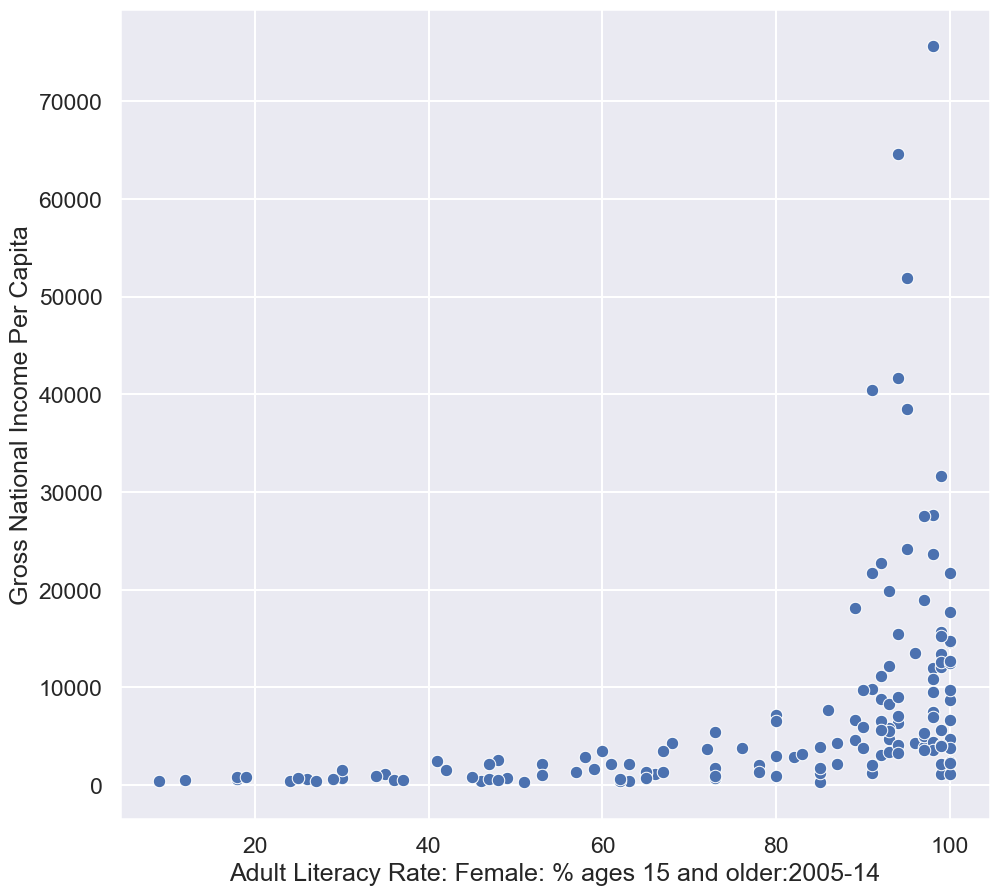

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['lit'], y = df['inc'])
plt.xlabel("Adult Literacy Rate: Female: % ages 15 and older: 2005-14")
plt.ylabel('Gross National Income Per Capita')
plt.show()


We can better assess the relationship between two variables when they have been straightened because it is easier for us to recognize linearity.

In the cell below, create a scatter plot of log-transformed income per capita against literacy rate. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.

<!--
BEGIN QUESTION
name: q1d2
-->

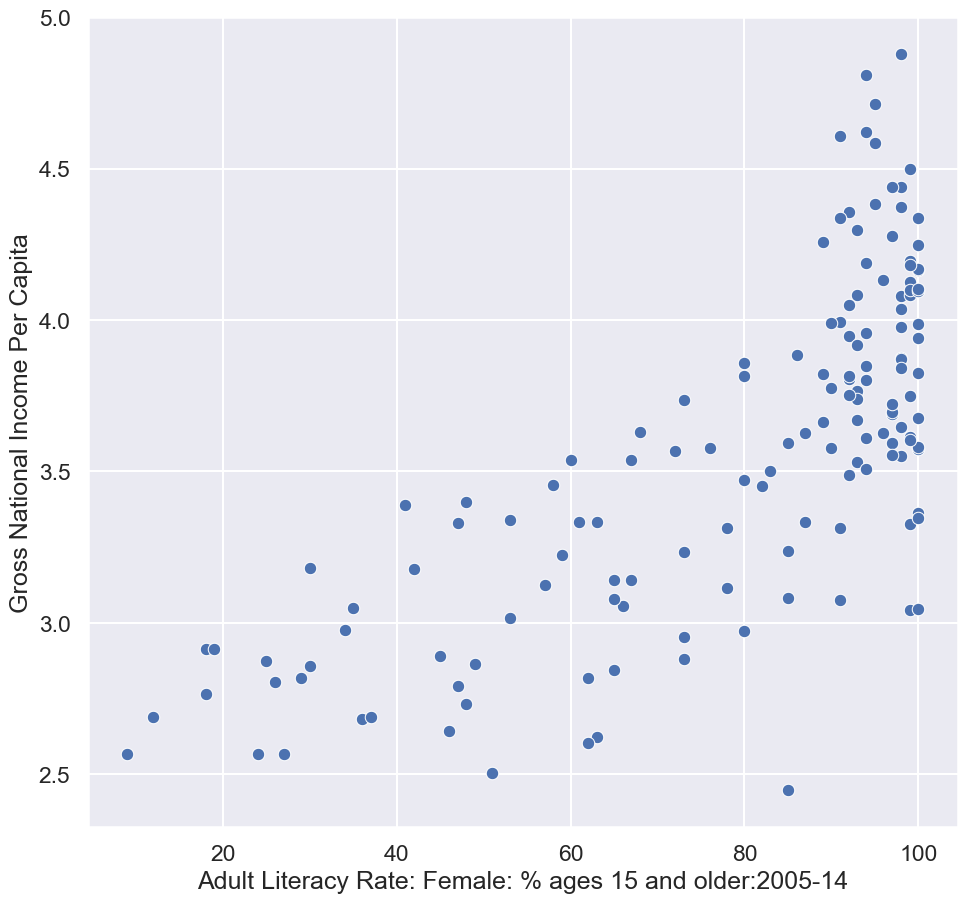

In [39]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = df['lit'], y = np.log10(df['inc']))
plt.xlabel("Adult Literacy Rate: Female: % ages 15 and older: 2005-14")
plt.ylabel('Gross National Income Per Capita')
plt.show()


This scatter plot looks better. The relationship is closer to linear.

We can think of the log-linear relationship between x and y, as follows: a constant change in x corresponds to a percent (scaled) change in y.

We can also see that the long left tail of literacy is represented in this plot by a lot of the points being bunched up near 100. Try squaring literacy and taking the log of income. Does the plot look better? 

<!--
BEGIN QUESTION
name: q1d3
-->

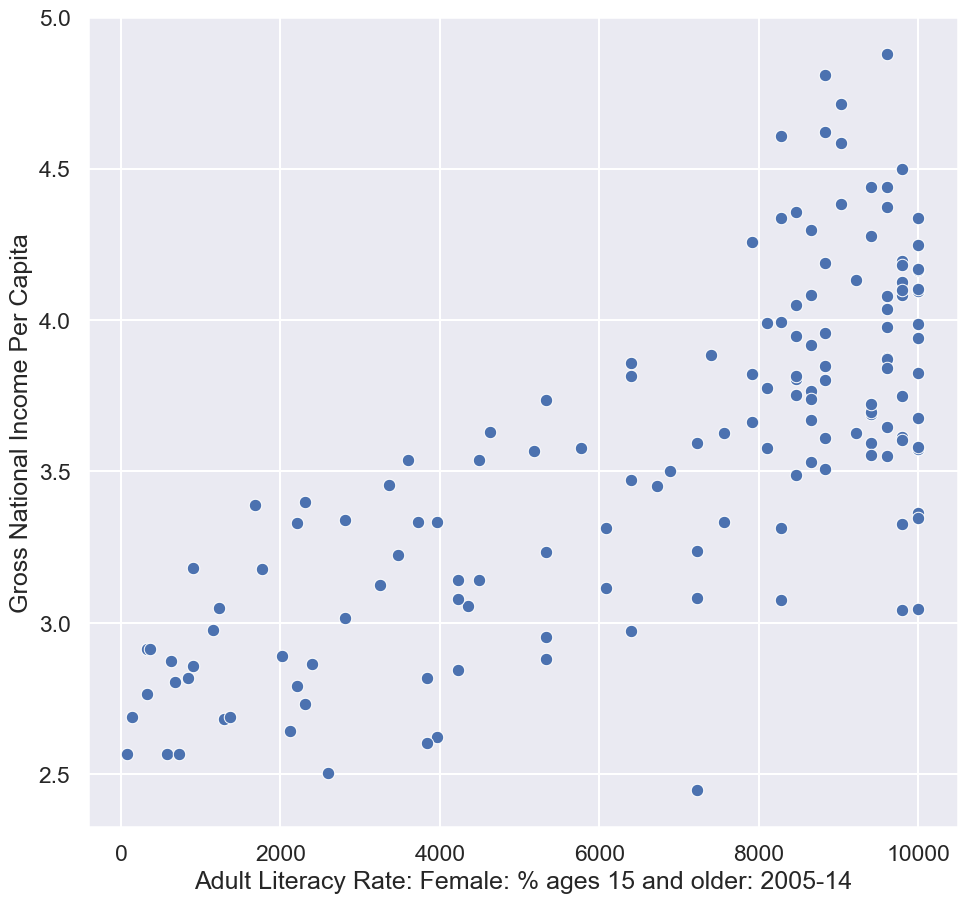

In [44]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = (df['lit']**2), y = np.log10(df['inc']))
plt.xlabel("Adult Literacy Rate: Female: % ages 15 and older: 2005-14")
plt.ylabel('Gross National Income Per Capita')
plt.show()


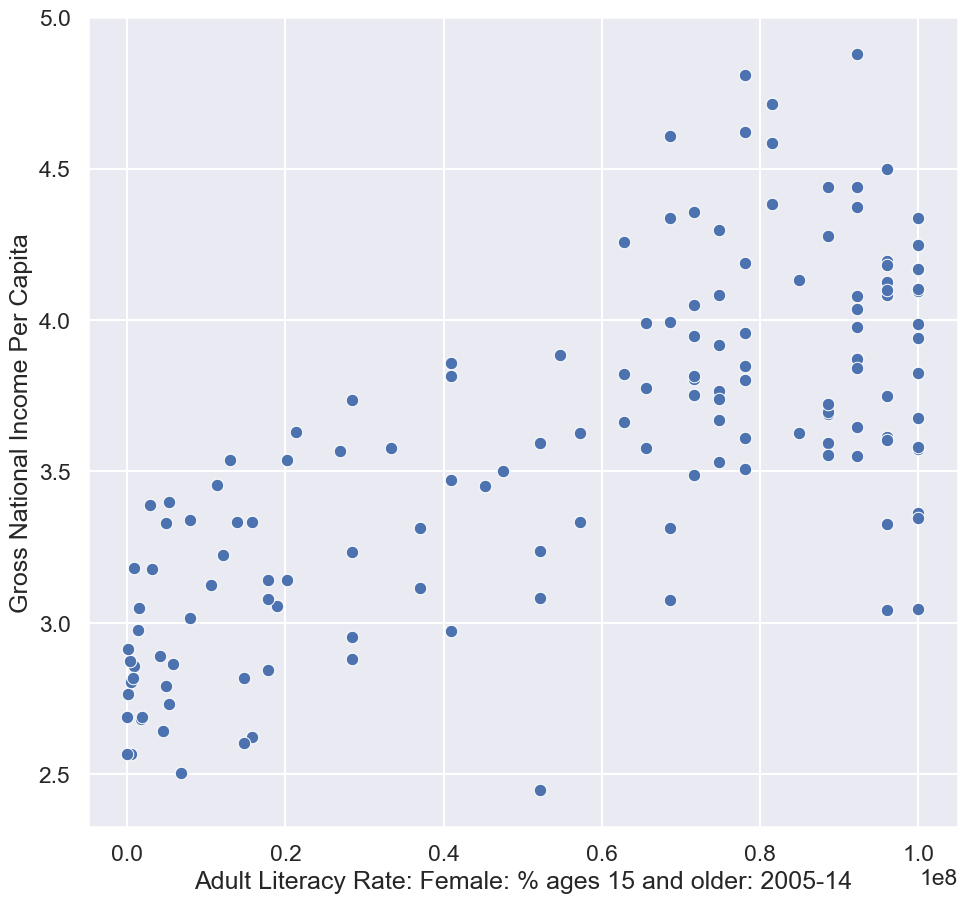

In [47]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = (df['lit']**4), y = np.log10(df['inc']))
plt.xlabel("Adult Literacy Rate: Female: % ages 15 and older: 2005-14")
plt.ylabel('Gross National Income Per Capita')
plt.show()

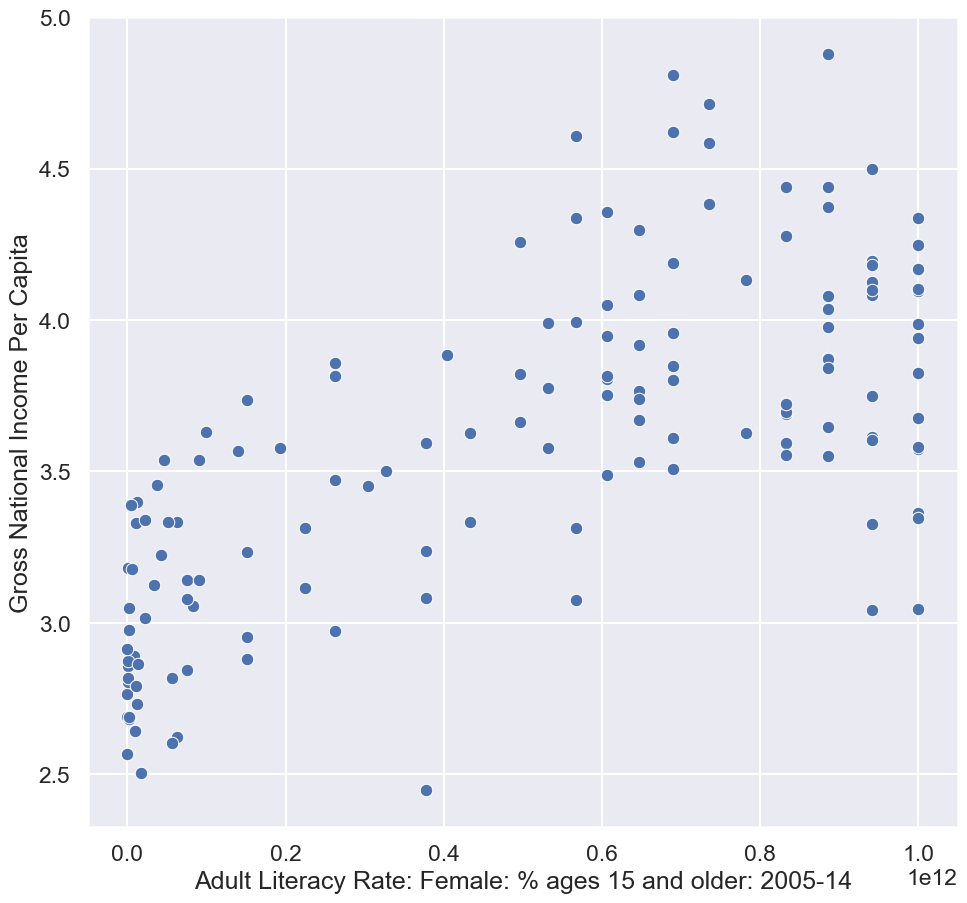

In [48]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = (df['lit']**6), y = np.log10(df['inc']))
plt.xlabel("Adult Literacy Rate: Female: % ages 15 and older: 2005-14")
plt.ylabel('Gross National Income Per Capita')
plt.show()

In [49]:
#The bigger the transofrmation, the smaller the clusters are. Points are more spaced apart. So futher clusters are better because its more symmetrical. 

Choosing the best transformation for a relationship is often a balance between keeping the model simple and straightening the scatter plot. Note however that with our transformations, we have complicated interpretation of our axes. This is a tradeoff to keep in mind when presenting data. 

# Part 2: Kernel Density Estimation

In this part of the lab you will develop a deeper understanding of how kernel density estimation works.

### Overview

Kernel density estimation is used to estimate a probability density function (i.e. a density curve) from a set of data. A density function's total area must sum to 1.

KDE centrally revolves around this idea of a "kernel". A kernel is a function whose area sums to 1. The three steps involved in building a kernel density estimate are:
1. Placing a kernel at each observation
2. Normalizing kernels so that the sum of their areas is 1
3. Summing all kernels together

The end result is a function, that takes in some value `x` and returns a density estimate at the point `x`.

When constructing a KDE, there are several choices to make regarding the kernel. Specifically, we need to choose the function we want to use as our kernel, as well as a bandwidth parameter, which tells us how wide or narrow each kernel should be. We will explore these ideas now.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram as shown below.

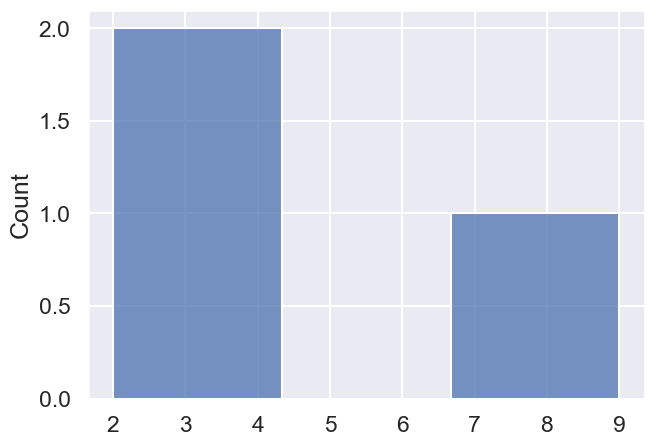

In [61]:
data3pts = np.array([2, 4, 9])
sns.histplot(x = data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

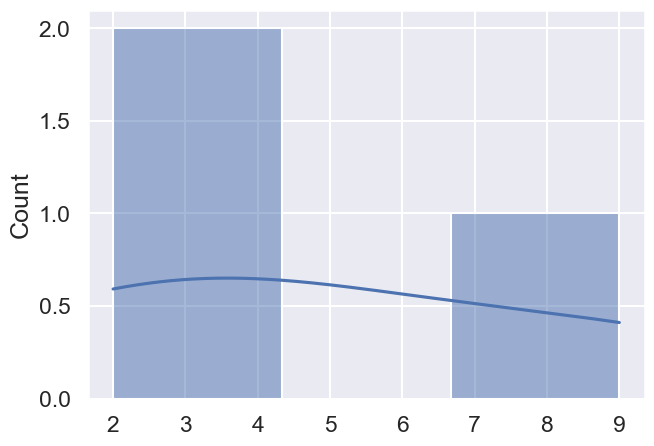

In [62]:
sns.histplot(x = data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting KDE is quite different. Note that when adjusting the KDE in seaborn, we need to layer a KDE plot on top of our histogram. Try experimenting with different values of bandwidth and see what happens.

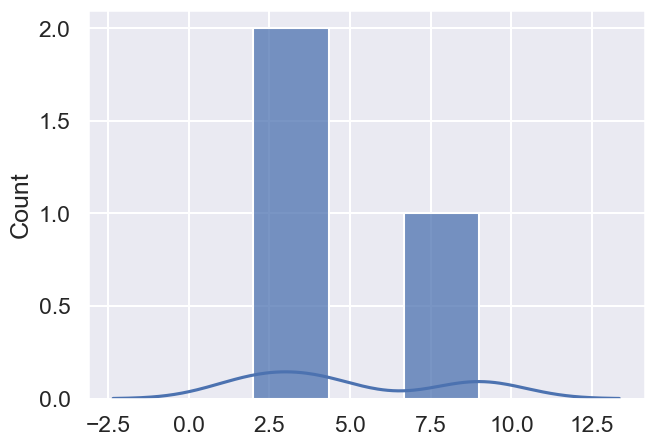

In [63]:
sns.histplot(x = data3pts, kde = False)
sns.kdeplot(x = data3pts, bw_adjust = 0.5);

## Question 2a

As mentioned above, the kernel density estimate (KDE) is just the sum of a bunch of copies of the kernel, each centered on our data points. The default kernel used by the `histplot` function (as well as `kdeplot`) is the Gaussian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

We've implemented the Gaussian kernel for you in Python below. Here, `alpha` is the smoothing or bandwidth parameter $\alpha$ for the KDE, `z` is the center of the Gaussian (i.e. a data point or an array of data points), and `x` is an array of values of the variable whose distribution we are plotting.

In [64]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

For example, we can plot the Gaussian kernel centered at 9 with $\alpha$ = 0.5 as below: 

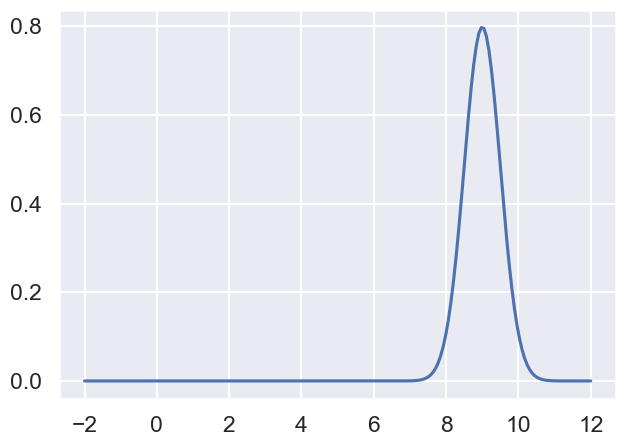

In [65]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = gaussian_kernel(alpha, xs, 9)
sns.lineplot(x = xs, y = kde_curve);

In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5. Recall that our three data points are 2, 4, and 9. 

**Note:** Make sure to normalize your kernels! This means that the area under each of your kernels should be $\frac{1}{3}$ since there are three data points.

**Hint:** To plot multiple plots at once, you can call `sns.lineplot` multiple times.

<!--
BEGIN QUESTION
name: q2a1
-->

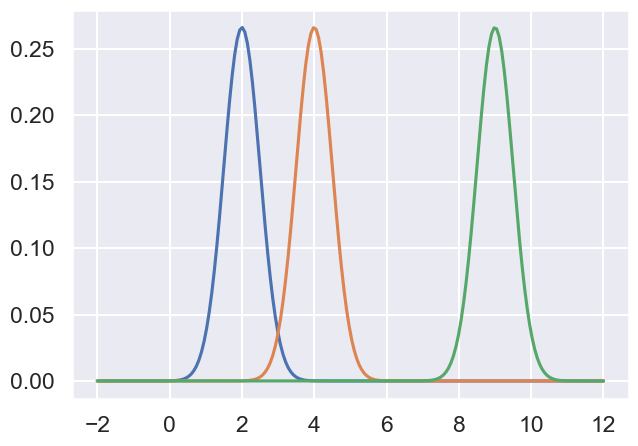

In [66]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [1/3 * gaussian_kernel(alpha, x, data3pts) for x in xs]
plt.plot(xs, kde_curve);


In the cell below, create a plot showing the sum of all three of the kernels above. Your plot should closely resemble the kde shown when you called `kdeplot` function with bandwidth 0.5 earlier. The area under your final curve should be 1 since the area under each of the three normalized kernels is $\frac{1}{3}$.

<!--
BEGIN QUESTION
name: q2a2
-->

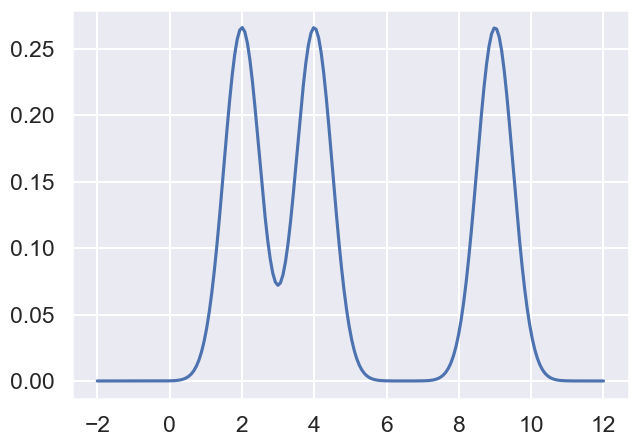

In [67]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = np.array([1/3 * gaussian_kernel(alpha, x, data3pts) for x in xs])
plt.plot(xs, np.sum(kde_curve, axis = 1));


## Question 2b

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data. You may want to plot it again for the next question.

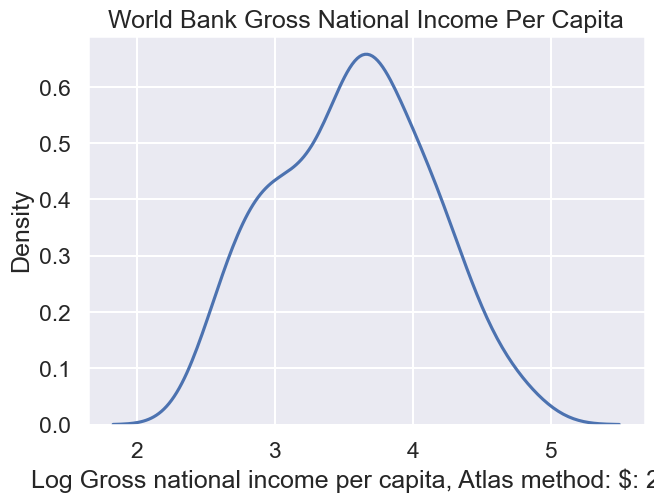

In [68]:
sns.kdeplot(np.log10(df['inc']))
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');


In the cell below, make a similar plot using your technique from question 2a. Give an estimate of the $\alpha$ value chosen by the `sns.kdeplot` function by tweaking your `alpha` value until your plot looks almost the same. Make sure to normalize your graph, so the area under the curve is 1.

<!--
BEGIN QUESTION
name: q2b
-->

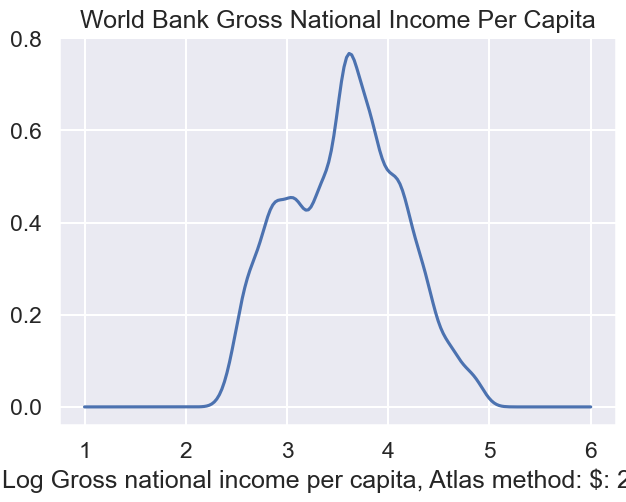

In [69]:
xs = np.linspace(1, 6, 200)
alpha=0.1
kde_curve = np.array([1/len(df['inc']) * gaussian_kernel(alpha, x, np.log10(df['inc'])) for x in xs])
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016')
plt.plot(xs, np.sum(kde_curve, axis = 1));


**Congrats!** You are finished with this assignment.

## Submission

Make sure you have run all cells in your notebook in order.  Then be sure to execute the following commands in the File menu:

* Save and Checkpoint
* Close and Halt

Then submit your .ipynb file to Canvas assignment Lab 4.
